#### Simple Polynomial Regression Implementation:

**Steps:**

* *Step 1.* Create a dataset that follows non-linear relationship.

* *Step 2.* Perform Linear Regression First and analyze the Accuaracy of the model.

* *Step 3.* Perform Polynomial Regression after Linear Regression and analyze the Accuracy so as to find that how Polynomial Regression models the non-linear data better than Linear Regression.

* *Step 4.* Visualize via plots wherever there's need.

* *Step 5.* Predict for Future values (new values).

---

##### Import necessay libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Create a Dataset that follows non-linear relationship

quadratic equations are a primary example of non-linear relationships.

In mathematics, a "linear" relationship means that the rate of change between two variables is constant, resulting in a straight line.Quadratic equations break this rule because they involve a variable raised to the power of 2  $(x^2)$, which causes the rate of change to increase or decrease as you move along the graph.

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5*X**2 + 1.5*X + 2 + np.random.randn(100, 1)

# Here. we used y = aX^2 + bX + c to get an non-linear relationship between X and y

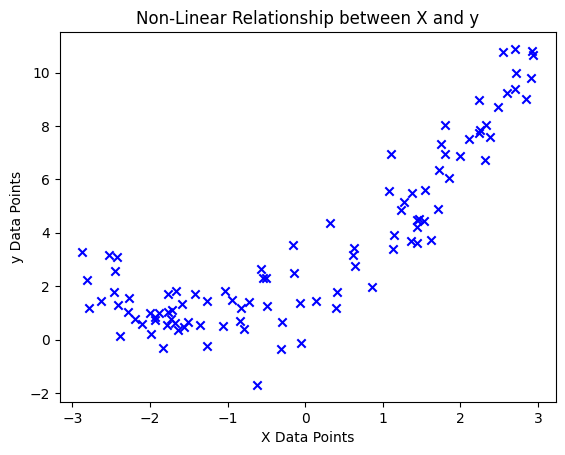

In [4]:
plt.scatter(X, y, color='b', marker='x')
plt.title('Non-Linear Relationship between X and y')
plt.xlabel('X Data Points')
plt.ylabel('y Data Points')
plt.show()

##### Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
print('The Data get splitted in 25% Test Data and 75% Training Data:')
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'y Train: {y_train.shape}')
print(f'y Test: {y_test.shape}')

The Data get splitted in 25% Test Data and 75% Training Data:
X Train: (75, 1)
X Test: (25, 1)
y Train: (75, 1)
y Test: (25, 1)


##### Implement Simple Linear Regression

(We are skipping the step of standardization because during the creation of data we did standardization)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linear_reg = LinearRegression()

In [10]:
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred_linear = linear_reg.predict(X_test)

##### Calculate the accuracy using r2_Score

In [11]:
from sklearn.metrics import r2_score

In [13]:
score = r2_score(y_test, y_pred_linear)


In [15]:
print(f'Linear Model Accuracy: {score}')

Linear Model Accuracy: 0.6925201747916184


##### Let's visualize this linear regression model

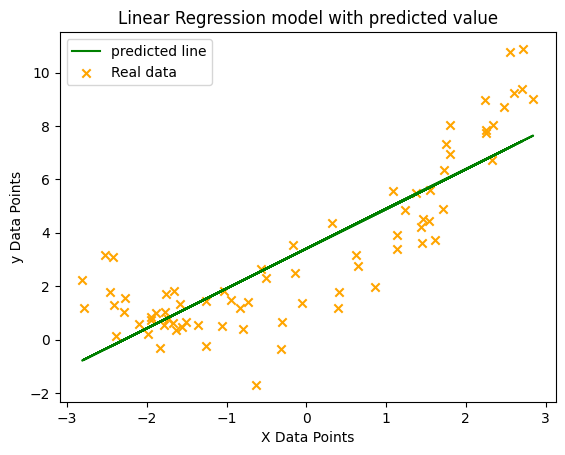

In [19]:
plt.plot(X_train, linear_reg.predict(X_train), color='green', label='predicted line')
plt.scatter(X_train, y_train, color='orange', marker='x', label='Real data')
plt.title("Linear Regression model with predicted value")
plt.xlabel('X Data Points')
plt.ylabel('y Data Points')
plt.legend()
plt.show()

as we can clearly see on non-linear data linear regression model performs poorly with accuracy of 69%.

Let's perform Polynomial Regression to tackle this issue and create a curved best-fit line:

##### Perform Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
polynomial_trans = PolynomialFeatures(degree=2, include_bias=True)

A **polynomial regression** model with a degree of 2 and a bias term is commonly referred to as a **quadratic regression** model.

In this context, the **"bias"** (also known as the intercept) is the constant value where the curve crosses the y-axis, and the **"degree 2"** means the highest power of the independent variable ($x$) is 2.

### The Equation
The general equation for this model is:

$$y = 1 + \beta_1x + \beta_2x^2 + \epsilon$$

Where:
* **$y$**: The dependent variable (what you are trying to predict).
* **$1$**: The **bias** (intercept), representing the value of $y$ when $x=0$.
* **$\beta_1$**: The coefficient for the linear term ($x$).
* **$\beta_2$**: The coefficient for the quadratic term ($x^2$), which determines the "bend" or curvature of the line.
* **$\epsilon$**: The random error term (residual).

In [34]:
X_train_poly = polynomial_trans.fit_transform(X_train)
X_test_poly = polynomial_trans.transform(X_test)

In [56]:
X_train_poly[:5]

# Here, the first column is bias (1), the second one independent feature 1 (B1x), and third one is independent feature with degree 2 (B2x^2)

array([[ 1.        , -2.38254134,  5.67650324],
       [ 1.        , -1.83788388,  3.37781717],
       [ 1.        , -0.72823042,  0.53031954],
       [ 1.        ,  0.64839716,  0.42041888],
       [ 1.        , -0.79286494,  0.62863481]])

now that the polynomial degree is set we can use `X_train_poly` to predict `X_test_poly` using `LinearRegression()`. 

*Note:* We don't actually have a Polynomial regression model like `LinearRegression()`. So, we use `PolynomialFeatures()` to transform the data and then use Linear Regression on the transformed data thereby getting a curved best-fit line.

In [36]:
polynomial_reg = LinearRegression()

In [37]:
polynomial_reg.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred_polynomial = polynomial_reg.predict(X_test_poly)

In [39]:
# Calculate the r2_Score for model accuracy 
poly_score = r2_score(y_test, y_pred_polynomial)

In [40]:
print(f'Accuracy of Polynomial model: {poly_score}')

Accuracy of Polynomial model: 0.927083455351807


In [ ]:
# We have 

##### Plot the Polynomial Regression Model to visualize the curved best-fit line

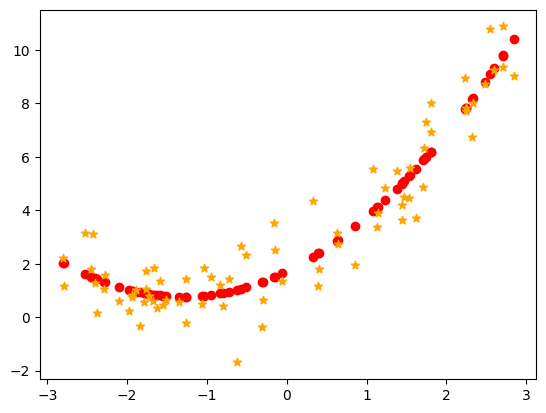

In [43]:
plt.scatter(X_train, polynomial_reg.predict(X_train_poly), color='red')
plt.scatter(X_train, y_train, color='orange', marker='*')
plt.show()

as the plot shows the predicted line is curved and is clearly modeling the non-linear data with the accuracy of 93%.

##### Prediction for new data

In [44]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)

In [45]:
X_new_poly = polynomial_trans.transform(X_new)

In [55]:
X_new_poly[:5]

array([[ 1.        , -3.        ,  9.        ],
       [ 1.        , -2.96984925,  8.82000455],
       [ 1.        , -2.93969849,  8.64182723],
       [ 1.        , -2.90954774,  8.46546804],
       [ 1.        , -2.87939698,  8.290927  ]])

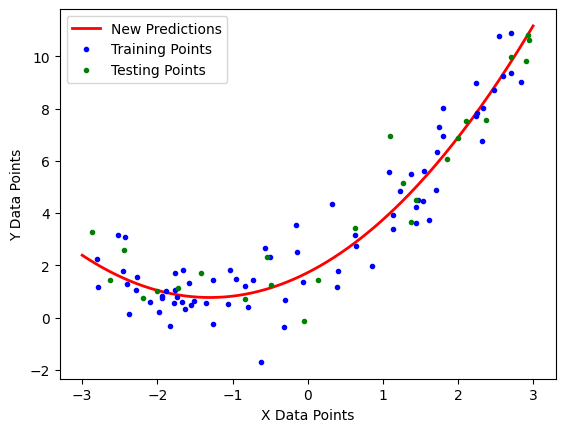

In [54]:
y_new_pred = polynomial_reg.predict(X_new_poly)
plt.plot(X_new, y_new_pred, 'r-', linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X Data Points')
plt.ylabel('Y Data Points')
plt.legend()
plt.show()

This visualization illustrates a **Polynomial Regression model** of degree 2 (quadratic) being fitted to a dataset. It demonstrates how the model captures the non-linear relationship between the $X$ and $Y$ data points.

### **Key Components of the Visualization**

* **Training Points (Blue Dots):** These represent the primary data used to "teach" the model. You can see they follow a clear U-shaped trend, though there is significant "noise" (variance) around the central path.
* **Testing Points (Green Dots):** These are independent data points used to evaluate how well the model generalizes to new, unseen information. They align well with the overall trend of the training data.
* **New Predictions (Red Line):** This is the **Polynomial Regression curve**. Because it is degree 2, it forms a **parabola**. The line represents the model's best fit, effectively smoothing out the noise to show the underlying relationship.

---

### **Observations**

| Feature | Insight |
| :--- | :--- |
| **Model Fit** | The red curve passes through the "center" of both the training and testing points, suggesting the model has a good balance—neither underfitting (too simple) nor overfitting (too complex). |
| **Non-Linearity** | A simple linear regression (straight line) would fail here because the data dips around $x = -1.5$ and rises sharply as $x$ increases toward $3$. The quadratic term ($x^2$) allows the model to "bend" to match this. |
| **Bias/Intercept** | Visually, the curve crosses the Y-axis ($x=0$) at approximately $y=1.5$ to $2.0$. This represents the bias or intercept term in your regression equation. |

### **Summary of the Code Logic**
The code snippet reveals that the model was first transformed using `PolynomialFeatures` (to create the $x^2$ term) and then predicted over a range of values (`X_new`) to generate that smooth red line. This is a standard way to visualize how a machine learning model "sees" a non-linear trend.